# TOPIK 5 6 STUDI INDEPENDEN ZENIUS 2022

Link : https://zenius.instructure.com/courses/164/assignments/613

## 1. Create the following Pandas DataFrame 

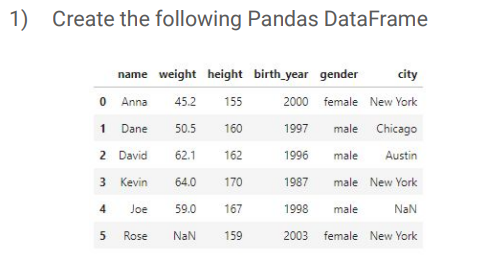

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Create DataFrame

In [2]:
# input data
data = {
    'Name':['Anna', 'Dane', 'David', 'Kevin', 'Joe', 'Rose'],
    'Weight':[42.5, 50.5, 62.1, 64.0, 59.0, None],
    'Height':[155, 160, 162, 170, 167, 159],
    'Birth_Year':[2000, 1997, 1996, 1987, 1998, 2003],
    'Gender':['female', 'male', 'male', 'male', 'male', 'female'],
    'City':['NewYork', 'Chicago', 'Austin', 'New York', None, 'New York'],
}

# create dataframe
df = pd.DataFrame(data)

# replace None with Np.NaN
df = df.fillna(value=np.nan)

# show output
df

,Name,Weight,Height,Birth_Year,Gender,City
0,Anna,42.5,155,2000,female,NewYork
1,Dane,50.5,160,1997,male,Chicago
2,David,62.1,162,1996,male,Austin
3,Kevin,64.0,170,1987,male,New York
4,Joe,59.0,167,1998,male,NaN
5,Rose,NaN,159,2003,female,New York


### Checking Data Info

In [3]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        6 non-null      object 
 1   Weight      5 non-null      float64
 2   Height      6 non-null      int64  
 3   Birth_Year  6 non-null      int64  
 4   Gender      6 non-null      object 
 5   City        5 non-null      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 416.0+ bytes


### Checking Missing Data

In [4]:
# sum all null value
df.isnull().sum()

Name          0
Weight        1
Height        0
Birth_Year    0
Gender        0
City          1
dtype: int64

In [5]:
# percentage of missing value
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum() / df.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
print(missing_data)

            Total Missing     %
Weight                  1  16.7
City                    1  16.7
Name                    0   0.0
Height                  0   0.0
Birth_Year              0   0.0
Gender                  0   0.0


## 2. Create another Pandas DataFrame as the following and merge it with the previous DataFrame (key=name and nick name). Make sure that no rows are missing from the original DataFrame

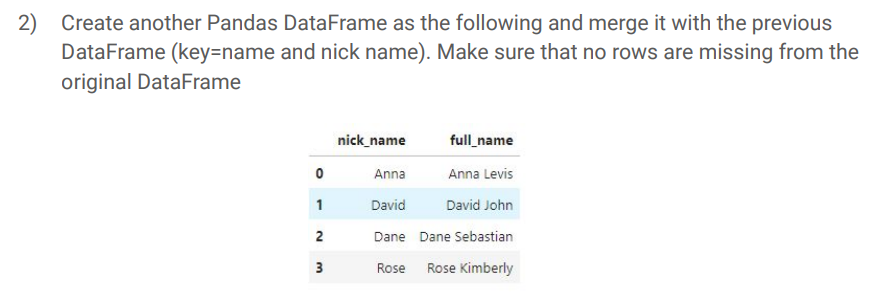

### Create New DataFrame

In [6]:
# input data
data_name = {
    'Nick_Name':['Anna', 'David', 'Dane', 'Rose'],
    'Full_Name':['Anna Levis', 'David John', 'Dane Sebastian', 'Rose Kimberly'],
}

# create dataframe
df_name = pd.DataFrame(data_name)

# show output
df_name

,Nick_Name,Full_Name
0,Anna,Anna Levis
1,David,David John
2,Dane,Dane Sebastian
3,Rose,Rose Kimberly


### Merging 2 DataFrame

In [7]:
# Merge using left join with "Name" = "Nick Name"
df = df.merge(df_name, left_on='Name', right_on='Nick_Name', how='left')

# show output
df

,Name,Weight,Height,Birth_Year,Gender,City,Nick_Name,Full_Name
0,Anna,42.5,155,2000,female,NewYork,Anna,Anna Levis
1,Dane,50.5,160,1997,male,Chicago,Dane,Dane Sebastian
2,David,62.1,162,1996,male,Austin,David,David John
3,Kevin,64.0,170,1987,male,New York,NaN,NaN
4,Joe,59.0,167,1998,male,NaN,NaN,NaN
5,Rose,NaN,159,2003,female,New York,Rose,Rose Kimberly


## 3. Drop nick_name column and fill null values in the full_name from the merged DataFrame with their original name column

### Drop Column Nick_Name

In [8]:
# drop column
df = df.drop('Nick_Name', axis=1)

# show output
df

,Name,Weight,Height,Birth_Year,Gender,City,Full_Name
0,Anna,42.5,155,2000,female,NewYork,Anna Levis
1,Dane,50.5,160,1997,male,Chicago,Dane Sebastian
2,David,62.1,162,1996,male,Austin,David John
3,Kevin,64.0,170,1987,male,New York,NaN
4,Joe,59.0,167,1998,male,NaN,NaN
5,Rose,NaN,159,2003,female,New York,Rose Kimberly


### Fill NULL Value in Full_Name

In [9]:
# replace np.NaN on Full_Name with Name on the same row
df['Full_Name'].fillna(df['Name'], inplace=True)

# show output
df

,Name,Weight,Height,Birth_Year,Gender,City,Full_Name
0,Anna,42.5,155,2000,female,NewYork,Anna Levis
1,Dane,50.5,160,1997,male,Chicago,Dane Sebastian
2,David,62.1,162,1996,male,Austin,David John
3,Kevin,64.0,170,1987,male,New York,Kevin
4,Joe,59.0,167,1998,male,NaN,Joe
5,Rose,NaN,159,2003,female,New York,Rose Kimberly


## 4. Create a new ‘bmi’ column calculated based on the following formula

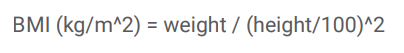

### Add New Column BMI

In [11]:
# add new column
df['BMI'] = df['Weight']/(pow((df['Height']/100), 2))

# show output
df

,Name,Weight,Height,Birth_Year,Gender,City,Full_Name,BMI
0,Anna,42.5,155,2000,female,NewYork,Anna Levis,17.689906
1,Dane,50.5,160,1997,male,Chicago,Dane Sebastian,19.726562
2,David,62.1,162,1996,male,Austin,David John,23.662551
3,Kevin,64.0,170,1987,male,New York,Kevin,22.145329
4,Joe,59.0,167,1998,male,NaN,Joe,21.155294
5,Rose,NaN,159,2003,female,New York,Rose Kimberly,NaN


## 5. Create a new ‘bmi_class’ column following the definition in the table below. 

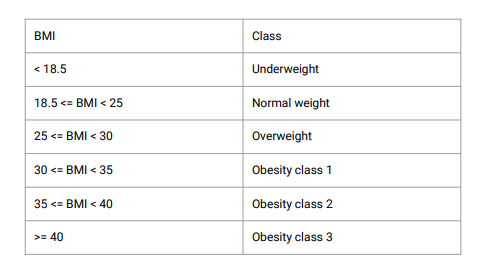

### ADD New Column BMI Class

In [14]:
# define function for classifier
def classifier(df):
  if df["BMI"] < 18.5:
    return "Underweight"
  elif df["BMI"] >= 18.5 and df["BMI"] < 25:
    return "Normal Weight"
  elif df["BMI"] >= 25 and df["BMI"] < 30:
    return "Overweight"
  elif df["BMI"] >= 30 and df["BMI"] < 35:
    return "Obesity Class 1"
  elif df["BMI"] >= 35 and df["BMI"] < 40:
    return "Obesity Class 2"
  elif df["BMI"] >= 40:
    return "Obesity Class 3"

# add new column
df['BMI_Class'] = df.apply(classifier, axis=1)

# replace None with np.NaN
df = df.fillna(value=np.nan)

# show output
df

,Name,Weight,Height,Birth_Year,Gender,City,Full_Name,BMI,BMI_Class
0,Anna,42.5,155,2000,female,NewYork,Anna Levis,17.689906,Underweight
1,Dane,50.5,160,1997,male,Chicago,Dane Sebastian,19.726562,Normal Weight
2,David,62.1,162,1996,male,Austin,David John,23.662551,Normal Weight
3,Kevin,64.0,170,1987,male,New York,Kevin,22.145329,Normal Weight
4,Joe,59.0,167,1998,male,NaN,Joe,21.155294,Normal Weight
5,Rose,NaN,159,2003,female,New York,Rose Kimberly,NaN,NaN
